In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# 为数据集添加最多几次幂，degree指定
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [7]:
X2.shape

(100, 3)

In [8]:
X2[:5, :]

array([[ 1.        , -1.05525502,  1.11356315],
       [ 1.        , -1.58775026,  2.5209509 ],
       [ 1.        , -1.40805117,  1.98260808],
       [ 1.        ,  1.41377787,  1.99876786],
       [ 1.        , -2.14597052,  4.60518947]])

In [10]:
X[:5, :] ** 2

array([[1.11356315],
       [2.5209509 ],
       [1.98260808],
       [1.99876786],
       [4.60518947]])

In [ ]:
# 第一列增加了常数项1，第二列为原来的X， 第三列为X的二次方项

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_predict = reg.predict(X2)

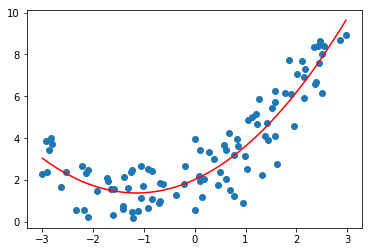

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [17]:
reg.coef_

array([0.        , 1.11295899, 0.4838786 ])

In [19]:
reg.intercept_

2.023953479754834

### PolynominalFeatures

In [23]:
X = np.arange(1, 11).reshape(-1, 2)

In [24]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [ ]:
# 有两个特征时（2列）的数据转换情况

In [26]:
poly2 = PolynomialFeatures(degree=2)
poly2.fit(X)
X2 = poly2.transform(X)

In [27]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
poly_reg = Pipeline(
    [
        ("ploy", PolynomialFeatures(degree=2)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ]
)

In [37]:
x = np.random.uniform(-3, 3, size=100)
y = 0.5 * x ** 2 + 2 * x + 3 + np.random.normal(0, 1, 100)

In [38]:
X = x.reshape(-1, 1)

In [40]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [41]:
y_predict = poly_reg.predict(X)

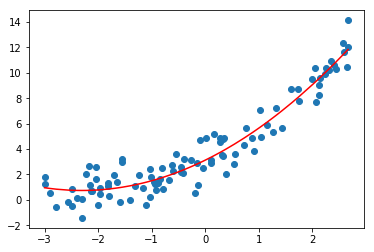

In [44]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')